In [101]:
# Importar librerías a utilizar
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns
from sklearn import metrics

In [102]:
# Leer archivo "World population.csv" y cargarlo a un dataframe
df = pd.read_csv("DataSets/AS3.9/American New Cars and Trucks of 2004.csv")

In [103]:
# Verificar cuantos datos perdidos hay
df.isna().sum()

Vehicle Name             0
Car Type                 0
Drive Train Type         0
Retail Price ($US)       0
Cost Price ($US)         0
Engine Size (litres)     0
Number cylinders         0
Horsepower (hp)          0
City  (km/100L)         14
Open Road (km/100L)     14
Weight (kg)              0
Wheel base (cm)          1
Length (cm)             25
Width (cm)              28
dtype: int64

In [104]:
# Usar dropna para eliminar las filas donde hay datos vacíos
df = df.dropna(how = 'any')

In [105]:
# Ver cuantos registros quedan
index = df.index
number_of_rows = len(index)
print(number_of_rows)

389


In [106]:
df.head()

,Vehicle Name,Car Type,Drive Train Type,Retail Price ($US),Cost Price ($US),Engine Size (litres),Number cylinders,Horsepower (hp),City (km/100L),Open Road (km/100L),Weight (kg),Wheel base (cm),Length (cm),Width (cm)
0,Chevrolet Aveo 4dr,regular,FrontWheelDr,11690.0,10965.0,1.6,4.0,103.0,8.4,6.9,1067.0,249.0,424.0,168.0
1,Chevrolet Aveo LS 4dr hatch,regular,FrontWheelDr,12585.0,11802.0,1.6,4.0,103.0,8.4,6.9,1057.0,249.0,389.0,168.0
2,Chevrolet Cavalier 2dr,regular,FrontWheelDr,14610.0,13697.0,2.2,4.0,140.0,9.0,6.4,1178.0,264.0,465.0,175.0
3,Chevrolet Cavalier 4dr,regular,FrontWheelDr,14810.0,13884.0,2.2,4.0,140.0,9.0,6.4,1204.0,264.0,465.0,173.0
4,Chevrolet Cavalier LS 2dr,regular,FrontWheelDr,16385.0,15357.0,2.2,4.0,140.0,9.0,6.4,1178.0,264.0,465.0,175.0


In [107]:
df.dtypes

Vehicle Name             object
Car Type                 object
Drive Train Type         object
Retail Price ($US)      float64
Cost Price ($US)        float64
Engine Size (litres)    float64
Number cylinders        float64
Horsepower (hp)         float64
City  (km/100L)         float64
Open Road (km/100L)     float64
Weight (kg)             float64
Wheel base (cm)         float64
Length (cm)             float64
Width (cm)              float64
dtype: object

In [108]:
# Convertir valores categóricos a numéricos
df['Car Type'] = df['Car Type'].astype('category').cat.codes
df['Drive Train Type'] = df['Drive Train Type'].astype('category').cat.codes
df

,Vehicle Name,Car Type,Drive Train Type,Retail Price ($US),Cost Price ($US),Engine Size (litres),Number cylinders,Horsepower (hp),City (km/100L),Open Road (km/100L),Weight (kg),Wheel base (cm),Length (cm),Width (cm)
0,Chevrolet Aveo 4dr,4,1,11690.0,10965.0,1.6,4.0,103.0,8.4,6.9,1067.0,249.0,424.0,168.0
1,Chevrolet Aveo LS 4dr hatch,4,1,12585.0,11802.0,1.6,4.0,103.0,8.4,6.9,1057.0,249.0,389.0,168.0
2,Chevrolet Cavalier 2dr,4,1,14610.0,13697.0,2.2,4.0,140.0,9.0,6.4,1178.0,264.0,465.0,175.0
3,Chevrolet Cavalier 4dr,4,1,14810.0,13884.0,2.2,4.0,140.0,9.0,6.4,1204.0,264.0,465.0,173.0
4,Chevrolet Cavalier LS 2dr,4,1,16385.0,15357.0,2.2,4.0,140.0,9.0,6.4,1178.0,264.0,465.0,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,Oldsmobile Silhouette GL,0,1,28790.0,26120.0,3.4,6.0,185.0,12.4,9.0,1777.0,305.0,511.0,183.0
400,Pontiac Montana,0,1,23845.0,21644.0,3.4,6.0,185.0,12.4,9.0,1711.0,284.0,475.0,183.0
401,Pontiac Montana EWB,0,0,31370.0,28454.0,3.4,6.0,185.0,13.1,9.8,1994.0,307.0,511.0,183.0
402,Toyota Sienna CE,0,1,23495.0,21198.0,3.3,6.0,230.0,12.4,8.7,1854.0,302.0,508.0,196.0


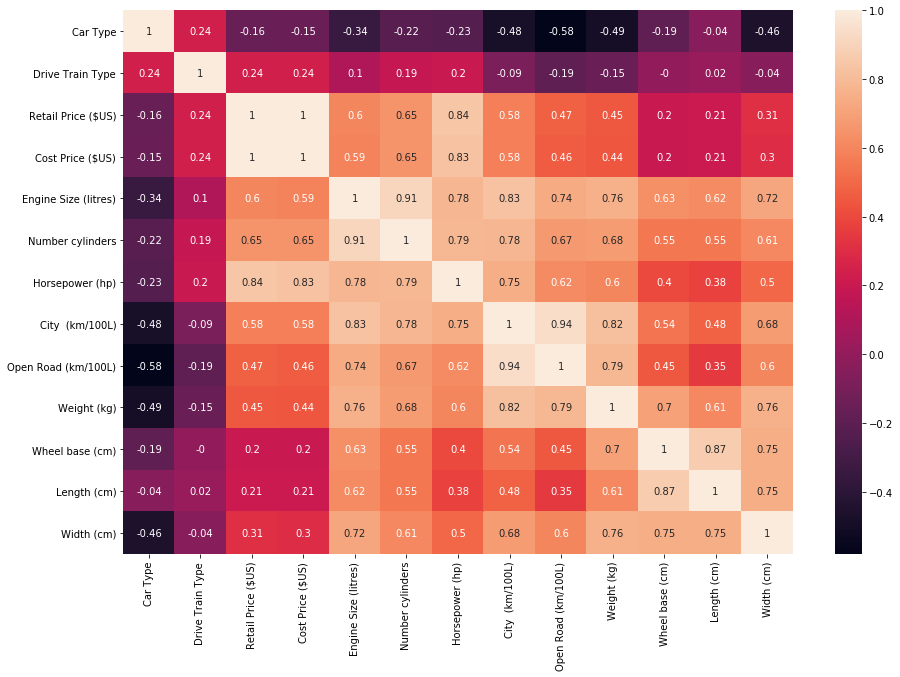

In [109]:
# Obtener una matriz de correlación
correlation_matrix = df.corr().round(2)
# Usar la matriz de correlación para dibujar un mapa de calor
# annot = True para mostrar los valores dentro del cuadro
plt.subplots(figsize=(15,10)) # Hacer tamaño mas grande
sns.heatmap(data=correlation_matrix, annot=True)

In [110]:
# Eliminar columnas que no seran necesarias
df = df.drop(columns=['Vehicle Name', 'Car Type', 'Drive Train Type', 'Retail Price ($US)', 'Open Road (km/100L)', 'Weight (kg)', 'Wheel base (cm)', 'Length (cm)', 'Width (cm)'])
df

,Cost Price ($US),Engine Size (litres),Number cylinders,Horsepower (hp),City (km/100L)
0,10965.0,1.6,4.0,103.0,8.4
1,11802.0,1.6,4.0,103.0,8.4
2,13697.0,2.2,4.0,140.0,9.0
3,13884.0,2.2,4.0,140.0,9.0
4,15357.0,2.2,4.0,140.0,9.0
...,...,...,...,...,...
399,26120.0,3.4,6.0,185.0,12.4
400,21644.0,3.4,6.0,185.0,12.4
401,28454.0,3.4,6.0,185.0,13.1
402,21198.0,3.3,6.0,230.0,12.4


In [111]:
# Aplicar escalamiento [0,1] a todos los valores
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_2 = min_max.fit_transform(df.values)
df_2 = pd.DataFrame(df_2, columns=df.columns)
df_2

,Cost Price ($US),Engine Size (litres),Number cylinders,Horsepower (hp),City (km/100L)
0,0.006659,0.043478,0.111111,0.071429,0.229592
1,0.011773,0.043478,0.111111,0.071429,0.229592
2,0.023350,0.173913,0.111111,0.159524,0.260204
3,0.024492,0.173913,0.111111,0.159524,0.260204
4,0.033491,0.173913,0.111111,0.159524,0.260204
...,...,...,...,...,...
384,0.099246,0.434783,0.333333,0.266667,0.433673
385,0.071900,0.434783,0.333333,0.266667,0.433673
386,0.113505,0.434783,0.333333,0.266667,0.469388
387,0.069176,0.413043,0.333333,0.373810,0.433673


In [152]:
# Uso de clasificación por KMeans
from sklearn.cluster import KMeans
clu = KMeans(n_clusters=3)
clu.fit(df_2)
clu.cluster_centers_

array([[0.25691623, 0.69254658, 0.54761905, 0.5526644 , 0.56304665],
       [0.11448309, 0.390354  , 0.32665452, 0.34281811, 0.44546671],
       [0.05194589, 0.13578047, 0.11020036, 0.17868852, 0.28947809]])

In [153]:
clu.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       2, 2, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 2, 2, 1, 1, 1, 1, 0, 2, 2, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       2, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 1, 1, 2, 1, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,

In [154]:
from sklearn.metrics import silhouette_score
silhouette_score(df_2, clu.labels_)

0.5039120863276969

In [155]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(df_2, clu.labels_)

573.2455736972096

In [156]:
# Guardar centros
centers = clu.cluster_centers_

In [157]:
# Calcular distancia entre los centros
for i in range(0,3):
    for j in range(0,3):
        distance = np. linalg. norm(centers[i] - centers[j])
        print(i,"-",j,":",distance)

0 - 0 : 0.0
0 - 1 : 0.4672187749061621
0 - 2 : 0.8706515746467918
1 - 0 : 0.4672187749061621
1 - 1 : 0.0
1 - 2 : 0.4084629239820651
2 - 0 : 0.8706515746467918
2 - 1 : 0.4084629239820651
2 - 2 : 0.0
